In [1]:
#거리값 - 데이터에 따라 적용방법이 달라진다.
#유클라디안 거리값
#manhattan distance : 절대값 - 직선거리가 아닌 가로세로로 진행
#binary distance : 이진-코드값에서 이진값이 다른 것을 거리값
#person distance : 상관계수
#mahalanobis distance : 공분산을 고려한 거리
#jaccard distance : 범주형인 경우

In [2]:
#kmeans는 scale이 필요하고 연속형 데이터를 정제로 한다.
#군집내 응집도는 최대화 - 거리값을 작게한다
#군집간 분리도 최대화 - 군집간 거리를 크게한다.

In [15]:
import numpy as np
import scipy
import sklearn.metrics.pairwise
#벡터의 거리값 : 차의 제곱을 더하고 루트를 취한 값
#2~3차원 뿐만 아니라 3차원 이상의 벡터에도 같은 방법으로 계산
a_64 = np.array([61.22,72.60,-65.755], dtype=np.float64)
b_64 = np.array([61.22,71.608,-65.72], dtype=np.float64)
a_32 = a_64.astype(np.float32)
b_32 = b_64.astype(np.float32)
dist_64_np = np.array([np.linalg.norm(a_64-b_64)], dtype=np.float64)
dist_32_np = np.array([np.linalg.norm(a_32-b_32)], dtype=np.float32)
dist_64_sklearn = sklearn.metrics.pairwise_distances([a_64],[b_64])
dist_32_sklearn = sklearn.metrics.pairwise_distances([a_32],[b_32])
dist_64_sklearn_manhatan = sklearn.metrics.pairwise_distances([a_64],[b_64],metric='manhattan')
#cityblock, cosine, l1(절대값거리), l2(피타고라스,제곱값), euclidean, manhattan 을 지원단다.

from sklearn.metrics.pairwise import euclidean_distances
#출력 정밀도 조정
np.set_printoptions(precision=10)
#유클리디안거리값 출력
print('유클리디안거리 ', euclidean_distances([a_64],[b_64]))
print(dist_64_np)
print(dist_32_np)
print(dist_64_sklearn)
print(dist_32_sklearn)
#출력정밀도 조정
print('맨하탄거리 ', dist_64_sklearn_manhatan)

유클리디안거리  [[0.9926172475]]
[0.9926172475]
[0.99261385]
[[0.9926172475]]
[[0.99261385]]
맨하탄거리  [[1.027]]


Text(0.5, 1.0, 'K=4, J=27.99')

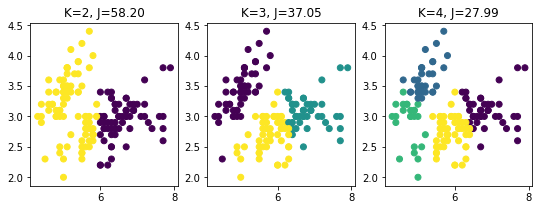

In [22]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns
iris = datasets.load_iris()
X = iris.data[:,:2]
y_iris = iris.target
km2 = cluster.KMeans(n_clusters=2).fit(X) #군집을 잘게 나누면 군집내 거리는 자동으로 작아진다.
km3 = cluster.KMeans(n_clusters=3).fit(X)
km4 = cluster.KMeans(n_clusters=4).fit(X)
plt.figure(figsize=(9,3))
plt.subplot(131)
#리턴값 = 군집의 중심값, 
# 군집의 레이블,
plt.scatter(X[:,0], X[:,1], c=km2.labels_)
#센터와의 거리값들의 합(군집내의 거리)
plt.title('K=2, J=%.2f'%km2.inertia_)
plt.subplot(132)
plt.scatter(X[:,0], X[:,1], c=km3.labels_)
plt.title('K=3, J=%.2f'%km3.inertia_)
plt.subplot(133)
plt.scatter(X[:,0], X[:,1], c=km4.labels_)
plt.title('K=4, J=%.2f'%km4.inertia_)

In [25]:
#k값의 정당성을 군집내 거리를 작게하는 것에서는 찾을 수 없다.
#무조건 좋은 k값이 아니다.

In [26]:
km3.cluster_centers_ #3*2행렬이 반환되는이유
#군집이 3개 변수가 2개이기 때문에

array([[5.006       , 3.428       ],
       [6.8127659574, 3.0744680851],
       [5.7735849057, 2.6924528302]])

In [29]:
km3.n_iter_
#중심값을 다시잡은 횟수
#중심값을 다시 잡는 기준은 inertia_값이다. 더크면 더이상 나누지 않는다.

13

In [31]:
km3.inertia_

37.05070212765958

In [ ]:
#kmeans hyper parameter
    #n_clusters
    #n_iter
    #init

[[7 5]
 [5 7]
 [7 7]
 [4 4]
 [4 6]
 [1 4]
 [0 0]
 [2 2]
 [8 7]
 [6 8]
 [5 5]
 [3 7]]


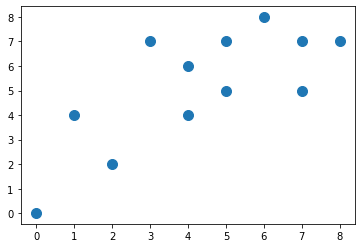

In [32]:
import pandas as pd
X = np.array([[7,5],[5,7],[7,7],[4,4],[4,6],[1,4],[0,0],[2,2],[8,7],[6,8],[5,5],[3,7]])
print(X)
plt.scatter(X[:,0],X[:,1],s=100)
plt.show()

In [33]:
from sklearn.cluster import KMeans

In [36]:
model = KMeans(n_clusters=2, init='random', n_init=1, max_iter=1, random_state=1).fit(X)
#센터값이 random이기 떄문에 값이 다르다.

In [37]:
print(model.cluster_centers_) #n2개

[[7.           7.3333333333]
 [3.4444444444 4.4444444444]]


In [39]:
model = KMeans(n_clusters=2, init='k-means++', n_init=1, max_iter=1, random_state=1).fit(X)
#영리하게 값을 잡아준다.
print(model.cluster_centers_) #2*2배열

[[3.4444444444 4.4444444444]
 [7.           7.3333333333]]


In [40]:
#ndarray 중심점을 입력할 수 있다. 중심값은 처음에 줄 수있다.

[3.4444444444 4.4444444444] [7.           7.3333333333]
[1 1 1 0 0 0 0 0 1 1 0 0]
12
70.76543209876544


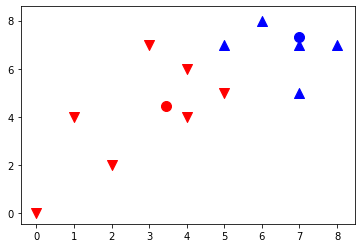

In [44]:
c0, c1 = model.cluster_centers_
#[3.4444444444 4.4444444444]
#[7.           7.3333333333]
print(c0,c1)
print(model.labels_) #[1 1 1 0 0 0 0 0 1 1 0 0]
print(len(model.labels_)) #12
print(model.inertia_)
#변수 2개
plt.scatter(X[model.labels_==0,0], X[model.labels_==0,1], s=100, marker='v', c='r')
plt.scatter(X[model.labels_==1,0], X[model.labels_==1,1], s=100, marker='^', c='b')
plt.scatter(c0[0],c0[1],s=100,c='r') #중심점
plt.scatter(c1[0],c1[1],s=100,c='b') #중심점
plt.show()

In [46]:
a = np.array([1.0,2.0,3.0,4.0]) #행데이터
print(a)
print(a.shape)
a_4_1 = a[:,np.newaxis] #차원증가 , 1차원->2차원 변경 행이 열로 변경된다.
print(a_4_1)
print(a_4_1.shape) #열데이터

[1. 2. 3. 4.]
(4,)
[[1.]
 [2.]
 [3.]
 [4.]]
(4, 1)


In [47]:
#vector, matrix, tensor
a = np.array([1,1,1,1,1]) #1*5, 5차원데이터 변수가 5개 있는것과 같다.
b = np.array([2,2,2,2,2]) #1*5
#-1, -1, -1, -1, -1 = 뺀 결과는 vector norm에 넣을 수 있다.
print(np.linalg.norm(a-b))
np.sqrt(np.sum(a-b)**2) #피타고라스 2차원 뿐만 아니라 모든 차원에 해당된다.
#1개의 벡터의 크기 = norm
#벡터 1개 : 크기, 벡터 2개 :거리값

2.23606797749979


5.0

In [51]:
def kmeans_df(c0,c1):
    df = pd.DataFrame(np.hstack([X, np.linalg.norm(X-c0, axis=1)[:,np.newaxis], 
                                 #결과값이 행으로 나오기 때문에 열의 데이터로 변환한 것이다.
                                 np.linalg.norm(X-c1, axis=1)[:,np.newaxis],
                                model.labels_[:,np.newaxis]]), #label또한 행데이터로 반환되기 때문에 열의 데이터로 변환하였음
                      columns = ['x0','x1','d0','d1','c'])
    return df
kmeans_df(c0,c1)
#x0,x1은 원래데이터
#앞의 중심에서의 거리, 뒤의 중심에서의 거리, 라벨

,x0,x1,d0,d1,c
0,7.0,5.0,3.598697,2.333333,1.0
1,5.0,7.0,2.991758,2.027588,1.0
2,7.0,7.0,4.378680,0.333333,1.0
3,4.0,4.0,0.711458,4.484541,0.0
4,4.0,6.0,1.651785,3.282953,0.0
5,1.0,4.0,2.484520,6.863753,0.0
6,0.0,0.0,5.622925,10.137938,0.0
7,2.0,2.0,2.839318,7.310571,0.0
8,8.0,7.0,5.223404,1.054093,1.0
9,6.0,8.0,4.378680,1.201850,1.0


In [52]:
print(X[model.labels_==0,0].mean(), X[model.labels_==0,1].mean())
print(X[model.labels_==1,0].mean(), X[model.labels_==1,1].mean())

2.7142857142857144 4.0
6.6 6.8


In [53]:
model.cluster_centers_

array([[3.4444444444, 4.4444444444],
       [7.          , 7.3333333333]])

In [55]:
model.score(X)
#전체적으로 중심으로부터의 거리값이 score값이 된다.
#총 거리값의 합

-70.76543209876543

In [59]:
c0_score = (np.linalg.norm(X[model.labels_==0]-c0, axis=1)**2).sum()
c1_score = (np.linalg.norm(X[model.labels_==1]-c1, axis=1)**2).sum()
c0_score + c1_score

70.76543209876543

In [65]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels=kmeans.fit_predict(X)
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='viridis',zorder=2) #zorder=2 포토샵에서 레이어를 얘기한다. 클수록 앞에 출력
    #데이터를 scatter로 찍는다.
    #레이블 별로 컬러값은 구분해서 찍음
    centers = kmeans.cluster_centers_ #4*2(k=4, 변수2개)
    radii = [cdist(X[labels==i], [centers]).max() for i, centers in enumerate(centers)] #(각 값들-센터)max -> 중심마다 4개가 나온다.
    #중심값을 가진만큼 받아서
    #레이블별로 중심값을 받아서 거리값을 구하는 cdist를 사용하여 최고값 구했다. -> 그그룹의 반지름값으로 사용
    for c,r in zip(centers, radii):
        #plt에 circle, ractangle, triangle, polygon 등 도형을 그리는 함수도 존재한다.
        ax.add_patch(plt.Circle(c,r,fc='#cccccc',lw=3,alpha=0.5,zorder=1))
        #c = 16진수로 12
        #cc = 16진수*16진수 256가지의 경우로 컬러표현

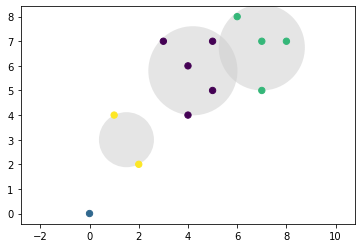

In [66]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

In [ ]:
#kmeans활용
    # 대분류 
        #선형회귀 : 그룹별(marketing 분류집단 고려 매출액증소)
    # targeting
    # 벡터양자화
    # 원형이상치제거

In [90]:
from sklearn.metrics import pairwise_distances_argmin #거리값중에 가장작은놈이 매개변수로 들어감
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
from sklearn.cluster import KMeans
from matplotlib import font_manager, rc #폰트지정시 사용, resource controler
#폰트를 별도로 지정하고 싶을때 사용

#파일이름과 패밀리이름은 불일치해서 조심해야 한다.
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name() #get_name() - 패밀리이름을 리턴
rc('font', family = font_name)

In [97]:
n_colors = 64 #컬러종류
china = load_sample_image('flower.jpg')
china = np.array(china, dtype=np.float64)/255 #/255 - 이미지 정규화한다.(왜냐하면 컬러값이 0~255값이므로 나눠 0~1사이의 값으로 변환)
#부동소수점 이미지로 바뀐다.

#이미지는 기본이 3차원(가로,세로,컬러(3byte))
#알파값까지 있는경우 argb
#이미지는 항상 사각형이고 다른 모형으로 보이는경우에는 나머지는 투명으로 되어있다.(PNG는 투명을 지원)
#메모리에서는 하나의 벡터로 저장
w,h,d = original_shape = tuple(china.shape)
#가로,세로,컬러(실데이터,해상도)
print(w,h,d) #427*640*3 =273280의 픽셀(픽셀도 사각형)
assert d==3 #변수값을 디버깅(확인)하기 위해서 사용
#참이아니면 더이상 진행하지않고 멈춘다.
image_array = np.reshape(china, (w*h,d)) #3차원->2차원으로 출력

t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000] #컬러를 뒤섞은 후 1000개만 골랐다.
#임의의 컬러 1000개에 대해서 64개의 컬러를 클러스터링
#64개는 중요한 컬러가 잡혔다. (cluster_centers_의 중심값에 들어잇다.)
kmeans = KMeans(n_clusters = n_colors, random_state=0).fit(image_array_sample) 
#중심값의 행렬 : 64*3(rgb)이 생성된다.
print('걸린시간 =%0.3f'%(time()-t0))

427 640 3
걸린시간 =0.619


In [140]:
china

array([[[0.0078431373, 0.0745098039, 0.0509803922],
        [0.0117647059, 0.0705882353, 0.0509803922],
        [0.0274509804, 0.0784313725, 0.0509803922],
        ...,
        [0.0039215686, 0.3019607843, 0.2509803922],
        [0.          , 0.2980392157, 0.2509803922],
        [0.          , 0.2941176471, 0.2470588235]],

       [[0.0039215686, 0.0705882353, 0.0470588235],
        [0.0117647059, 0.0705882353, 0.0509803922],
        [0.0274509804, 0.0784313725, 0.0509803922],
        ...,
        [0.          , 0.2980392157, 0.2509803922],
        [0.0039215686, 0.2901960784, 0.2549019608],
        [0.0039215686, 0.2901960784, 0.2549019608]],

       [[0.0078431373, 0.0666666667, 0.0470588235],
        [0.0235294118, 0.0745098039, 0.0470588235],
        [0.0274509804, 0.0784313725, 0.0509803922],
        ...,
        [0.0039215686, 0.2901960784, 0.2549019608],
        [0.0039215686, 0.2901960784, 0.262745098 ],
        [0.0039215686, 0.2901960784, 0.262745098 ]],

       ...,

      

In [139]:
image_array

array([[0.7607843137, 0.6078431373, 0.4862745098],
       [0.7529411765, 0.6078431373, 0.5019607843],
       [0.7490196078, 0.6039215686, 0.5294117647],
       ...,
       [0.3529411765, 0.5764705882, 0.1176470588],
       [0.3137254902, 0.5529411765, 0.0941176471],
       [0.2823529412, 0.537254902 , 0.0823529412]])

In [105]:
kmeans.cluster_centers_
#64*3의 컬러값이 생성
#모델에는 중심값이 잡혀있다.

array([[0.0000000000e+00, 3.7843137255e-01, 4.0980392157e-01],
       [7.4117647059e-01, 4.7254901961e-01, 2.4313725490e-01],
       [4.4117647059e-03, 1.6813725490e-01, 1.6470588235e-01],
       [8.3529411765e-01, 6.4575163399e-01, 4.3137254902e-01],
       [8.2352941176e-01, 1.2549019608e-01, 1.5686274510e-02],
       [1.1764705882e-02, 2.7254901961e-01, 2.6568627451e-01],
       [6.5359477124e-03, 5.2505446623e-02, 2.8758169935e-02],
       [2.8235294118e-01, 3.0588235294e-01, 2.5098039216e-01],
       [9.2549019608e-01, 7.7647058824e-01, 4.9803921569e-01],
       [8.1647058824e-01, 5.6078431373e-01, 3.1764705882e-01],
       [1.8954248366e-02, 1.3921568627e-01, 1.1666666667e-01],
       [8.5392156863e-01, 2.5882352941e-01, 2.2549019608e-02],
       [6.8235294118e-01, 4.7058823529e-02, 0.0000000000e+00],
       [2.0392156863e-01, 2.7058823529e-01, 1.2941176471e-01],
       [4.3137254902e-03, 3.2862745098e-01, 3.3529411765e-01],
       [5.3725490196e-01, 3.4509803922e-01, 1.764705882

In [98]:
print(labels) #64개
#컬러값을 라벨링했다.

[236  77  77 ... 199 199 199]


In [99]:
t0 = time()
labels = kmeans.predict(image_array) #비지도 학습인 kmeans가 예측을 하고 있다. 
#(어느그룹에 속할것인지, 중심값과의 거리값으로 결정하게 된다.)
#원래 데이터에 대하여 예측을 하고있다. 64개중에 하나에 그룹핑이 된다.
print('걸린시간 =%0.3f'%(time()-t0))

걸린시간 =0.372


In [100]:
#엘리어싱 - 계단식으로 컬러가 표현되는것
#엔티엘리어싱 - 그래픽카드가 좋은경우 계단이 부드럽게 표현된다.

In [101]:
codebook_random = shuffle(image_array, random_state=0)[:n_colors+1]
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)

def recreate_image(codebook, labels, w, h):
    d = codebook.shape[1]
    image = np.zeros((w,h,d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

In [137]:
kmeans.cluster_centers_

array([[0.7455182073, 0.8268207283, 0.9863445378],
       [0.3327058824, 0.4734117647, 0.2845490196],
       [0.6461873638, 0.7716775599, 0.3002178649],
       [0.5038281979, 0.5904761905, 0.8265172736],
       [0.5254901961, 0.7005159959, 0.6794633643],
       [0.7743137255, 0.7258823529, 0.6878431373],
       [0.4173669468, 0.6583753501, 0.1595518207],
       [0.61416122  , 0.5220043573, 0.4357298475],
       [0.925122549 , 0.9615196078, 0.9707107843],
       [0.2210526316, 0.4637770898, 0.0385964912],
       [0.6421288515, 0.726162465 , 0.9666106443],
       [0.3303921569, 0.287254902 , 0.2049019608],
       [0.8805074971, 0.914532872 , 0.8011534025],
       [0.7713423831, 0.8508295626, 0.5619909502],
       [0.1190730838, 0.2720142602, 0.0787878788],
       [0.4784313725, 0.3984749455, 0.3577342048],
       [0.692733564 , 0.629988466 , 0.5824682814],
       [0.2490196078, 0.3421568627, 0.6696078431],
       [0.3358101135, 0.5743034056, 0.1373581011],
       [0.649754902 , 0.7875   

In [138]:
labels

array([16, 16, 16, ..., 18, 18, 18])

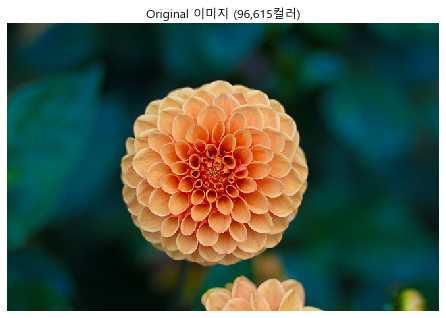

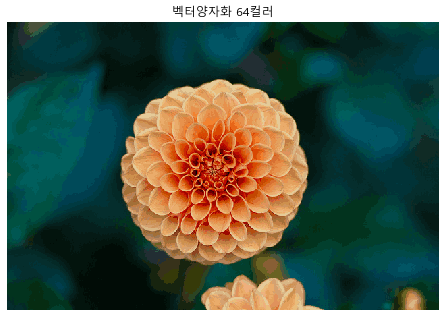

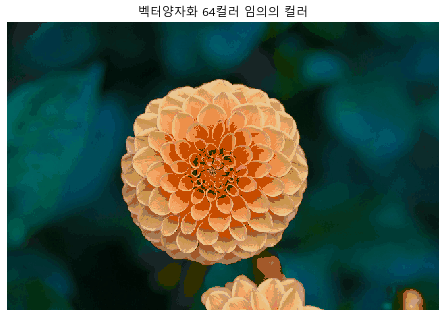

In [102]:
plt.figure(1)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')
plt.title('Original 이미지 (96,615컬러)')
plt.imshow(china)
plt.figure(2)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')
plt.title('벡터양자화 64컬러')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
plt.figure(3)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')
plt.title('벡터양자화 64컬러 임의의 컬러')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

In [103]:
n_colors = 256
china = load_sample_image('flower.jpg')
china = np.array(china, dtype=np.float64)/255 

w,h,d = original_shape = tuple(china.shape)
print(w,h,d)
assert d==3 
image_array = np.reshape(china, (w*h,d))

image_array_sample = shuffle(image_array, random_state=0)[:1000] 
kmeans = KMeans(n_clusters = n_colors, random_state=0).fit(image_array_sample) 

427 640 3
걸린시간 =2.509


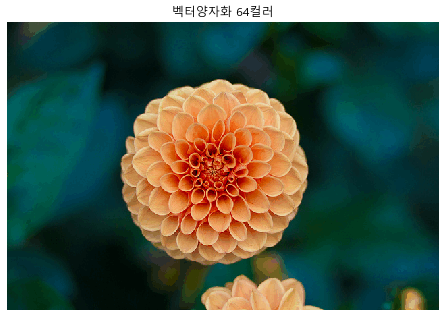

In [104]:
labels = kmeans.predict(image_array)

plt.figure(1)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')
plt.title('벡터양자화 256컬러')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
plt.show()

In [106]:
#컬러값을 labels이 대신하게 된다.
#cluster_centers에 256,64개의 컬러값으로 가지고있다.
#273280컬러값을 256개의 컬러값으로 변경
#라벨을 저장한 공간값은 273280 바이트 공간
#원래 이미지의 바이트 사이즈는 273280*3 = 819840 바이트 공간이 필요하고
#256*3 = 768바이트 + 273280 = 274048 약 1/3공간으로 표현된다.

In [107]:
#마케팅을 할 때 소비자들을 그룹별로 나누어 분석하게 될 수 있다.

<class 'PIL.JpegImagePlugin.JpegImageFile'>


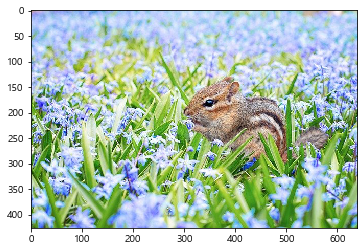

In [114]:
#문제
#웹에서 이미지를 다운받으시오
from PIL import Image
daram = Image.open('chip.jpg')
plt.imshow(daram)
print(type(daram))
plt.show()

In [116]:
#이미지 사이즈를 확인하시오
print(daram.size)

(640, 426)


In [141]:
#컬러를 16컬러로 벡터 양자화 하시오
from matplotlib.pyplot import imread
img = imread('chip.jpg')
print('바이트 사이즈 ',img.shape[0]*img.shape[1]*img.shape[2])

n_colors = 36
img = np.array(img, dtype=np.float64)/255 

w,h,d = original_shape = tuple(img.shape)
print(w,h,d)
assert d==3 
image_array = np.reshape(img, (w*h,d))

image_array_sample = shuffle(image_array, random_state=0)[:1000] 
kmeans = KMeans(n_clusters = n_colors, random_state=0).fit(image_array_sample) 

바이트 사이즈  817920
426 640 3


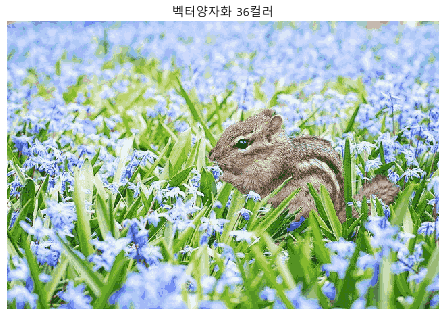

In [136]:
#양자화 된 값으로 이미지를 표현해 보시오
labels = kmeans.predict(image_array)

plt.figure(1)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')
plt.title('벡터양자화 36컬러')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
plt.show()

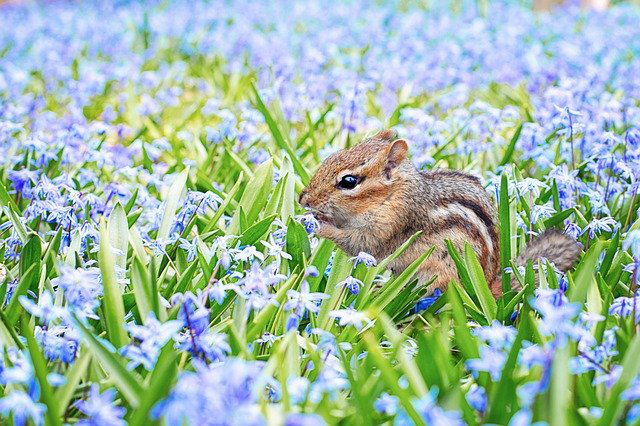

In [119]:
daram

In [189]:
img = imread('chip.jpg')
original_size= img.shape[0]*img.shape[1]*img.shape[2]
original_size

817920

In [190]:
byte_size=original_size
byte_size

817920

In [191]:
x,y,z=img.shape
img = np.array(img, dtype=np.float64)/255
img_2 = img.reshape(x*y,z)
img_2

array([[0.7607843137, 0.6078431373, 0.4862745098],
       [0.7529411765, 0.6078431373, 0.5019607843],
       [0.7490196078, 0.6039215686, 0.5294117647],
       ...,
       [0.3529411765, 0.5764705882, 0.1176470588],
       [0.3137254902, 0.5529411765, 0.0941176471],
       [0.2823529412, 0.537254902 , 0.0823529412]])

In [192]:
kmean_cluster = cluster.KMeans(n_clusters=16)
kmean_cluster.fit(img_2)
cluster_centers=kmean_cluster.cluster_centers_
cluster_centers

array([[0.5537499145, 0.7224141033, 0.2785623618],
       [0.6740794452, 0.7838209164, 0.7740180401],
       [0.1578339007, 0.2916903444, 0.0878139322],
       [0.3582901152, 0.3757149797, 0.3082631116],
       [0.5224102916, 0.5300857396, 0.4236570558],
       [0.5225367992, 0.6510822552, 0.8898523302],
       [0.6799370912, 0.7849520193, 0.4302199889],
       [0.2684864764, 0.5083465835, 0.1067267581],
       [0.4086700702, 0.6331230413, 0.172330963 ],
       [0.6632673642, 0.7636524556, 0.9545277682],
       [0.8385894513, 0.8896649339, 0.7759455236],
       [0.6006473709, 0.6745474256, 0.5801168222],
       [0.3273741355, 0.4439594127, 0.7553217157],
       [0.7694592344, 0.8397923954, 0.9720102437],
       [0.7706334137, 0.8209854721, 0.6065502438],
       [0.885470424 , 0.9279329446, 0.9725604931]])

In [193]:
clusters_label = kmean_cluster.labels_

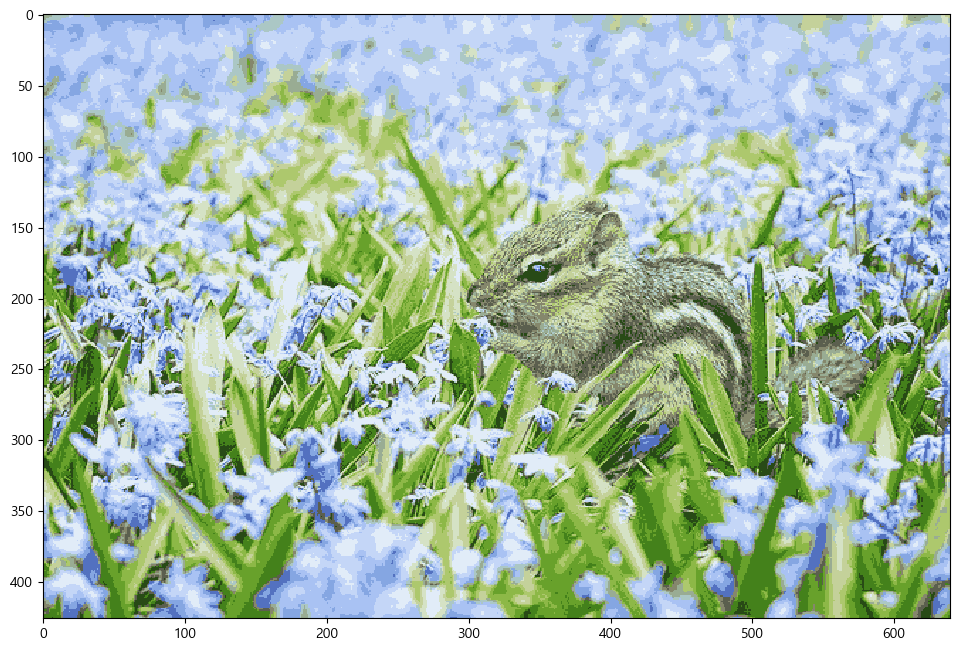

In [194]:
kmeans_size = (cluster_centers.shape[0]*cluster_centers.shape[1])+(cluster_centers.shape[0]*cluster_centers[1])
plt.figure(figsize=(15,8))
plt.imshow(cluster_centers[clusters_label].reshape(x,y,z))

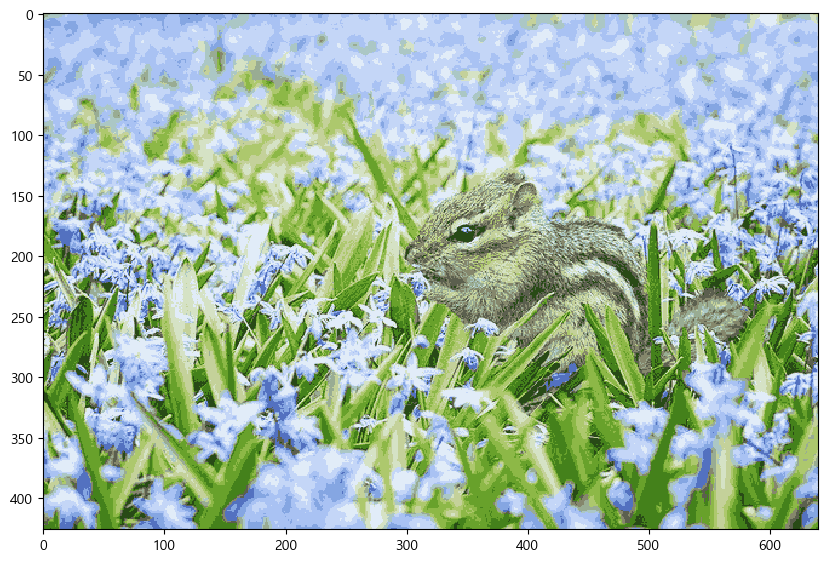

In [195]:
plt.imshow((cluster_centers*255).astype(np.uint8)[clusters_label].reshape(x,y,z))
#정규화된 것을 255를 곱해 원래 정수 이미지로 바꾼다.
#부동소수점이미지(0~1) 정수이미지(0~255)
#unsined int형 

In [156]:
#원형이상치 탐색
import numpy as np
from sklearn.datasets import make_blobs
x,label = make_blobs(100,centers=1)

In [157]:
kmeans = KMeans(n_clusters=1)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


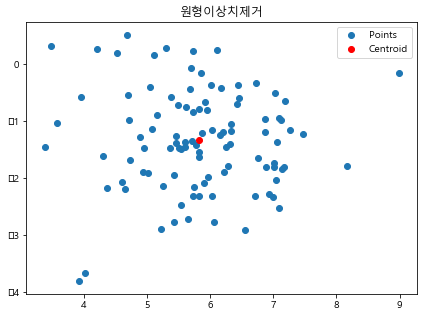

In [158]:
f, ax = plt.subplots(figsize=(7,5))
ax.set_title('원형이상치제거')
ax.scatter(x[:,0],x[:,1],label='Points')
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], label='Centroid', color='r')
ax.legend(loc='best')

In [159]:
distance = kmeans.transform(x)
sorted_idx = np.argsort(distance.ravel())[::-1][:5] #:: 간격을 의미한다.
#-1 역순으로
#정렬한 다음 역순으로 5번째 까지 거리가 먼 5개의 데이터의 인덱스를 결정

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


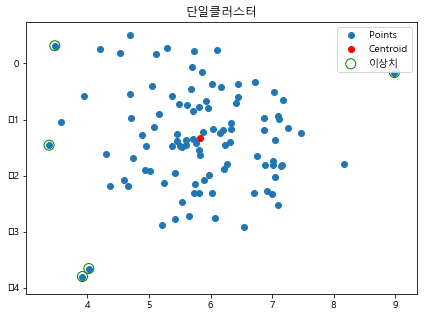

In [162]:
f, ax = plt.subplots(figsize=(7,5))
ax.set_title('단일클러스터')
ax.scatter(x[:,0],x[:,1],label='Points')
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], label='Centroid', color='r')
ax.scatter(x[sorted_idx][:,0], x[sorted_idx][:,1], label='이상치', edgecolors='g', facecolors='none', s=100)
#가장먼 데이터들이 녹색으로 표기되었다.
ax.legend(loc='best')

In [170]:
new_X = np.delete(x, sorted_idx, axis=0)
new_kmeans = KMeans(n_clusters=1)
new_kmeans.fit(new_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

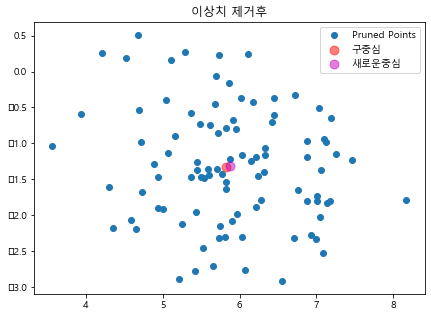

In [174]:
#반지름으로 이상치 제거
f, ax = plt.subplots(figsize=(7,5))
ax.set_title('이상치 제거후')
ax.scatter(new_X[:,0], new_X[:,1], label='Pruned Points')
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], label='구중심', color='r', s=80, alpha=0.5)
ax.scatter(new_kmeans.cluster_centers_[:,0], new_kmeans.cluster_centers_[:,1], label='새로운중심', color='m', s=80, alpha=0.5)
ax.legend(loc='best')

In [182]:
#엘보우 기법으로 k를 결정(elbow 기법)

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


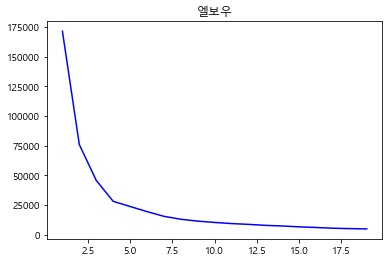

In [187]:
x = df.iloc[:,[2,4]].values
elbow = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=100) #kmeans를 돌렸다. 클러스터링 여러번
    kmeans.fit(x)
    elbow.append(kmeans.inertia_) #군집내의 거리합의 변화를 보여준다.
import seaborn as sns
sns.lineplot(range(1,20), elbow, color='blue')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('엘보우')
plt.show()
#3~4개의 그룹으로 그룹핑하는게 적당하다. 팔꿈치가 굽어지는 부분
#3,4개의 군집으로 그룹핑하는것이 적당해 보인다.